In [60]:
import tensorflow.keras as ks
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.utils import shuffle
from tensorflow.keras import backend as K

In [61]:
full_data = np.genfromtxt('U_desc.csv', delimiter= ',', skip_header=1)

In [56]:
training_set = full_data[:,:4]
training_targets = full_data[:,4]

##normalizing data
mean = training_set.mean(axis=0)
training_set -= mean
std = training_set.std(axis=0)
training_set /= std

print(training_set, training_targets)

[[ 9.07275581e-01 -6.43147968e-01 -7.89337002e-02  1.28825472e-01]
 [ 1.18052502e+00  1.37216263e-01  2.27059120e+00  2.41599449e-01]
 [ 9.03632255e-01  8.39490804e-02  4.33906760e-01  5.36428214e-02]
 [ 9.03632255e-01  1.15909390e-01 -9.28479763e-02 -3.28172271e-02]
 [ 9.03632255e-01 -5.97870862e-01  6.71443329e-01 -6.24880603e-01]
 [ 4.58417834e-01 -3.85782246e+00  2.10284466e-01  1.81103729e+00]
 [ 9.09461576e-01 -2.57408335e+00  8.42390149e-01  2.68315604e+00]
 [-1.13590157e+00  8.92757987e-02  1.95376313e-01  5.10377425e-01]
 [ 9.03632255e-01  5.42046854e-01 -8.11420946e-01 -3.82416554e-01]
 [-9.34061313e-01  2.25107115e-01 -1.14834520e+00 -2.13255589e-01]
 [ 9.36422188e-01  4.64809439e-01  6.07835210e-01  1.98106285e-02]
 [-1.02295846e+00  8.66124396e-02 -1.02510447e+00 -1.40215644e-02]
 [-1.10748362e+00 -1.39773088e-01 -4.69527306e-01  2.41599449e-01]
 [-1.05501973e+00  9.20243854e-01 -4.18839586e-01 -1.02361179e-01]
 [-9.07829366e-01  1.79830010e-01  1.03023288e+00  3.60012124e

In [57]:
avg_scores = []
epochs = []
avg_scores.clear()
epochs.clear()

In [58]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(training_set.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [62]:
I = 5
k = 5
num_val_samples = len(training_set) // k
num_epocs = 0
all_scores = np.zeros((I,k))

## epochs
for l in range(0, 500, 10):
    print(l)
    num_epochs = l
    
    ## iterations
    for i in range(I):
    
        ##shuffle
        training_set, training_targets = shuffle(training_set,
                                             training_targets)
        epochs.append(num_epochs)
        ##kfold
        for j in range(k):
            print('processing fold #', i, j)
            ##preping validation data from partition k
            val_data = training_set[i * num_val_samples: (i + 1) * num_val_samples]
            val_targets = training_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
            ##preping training data
            partial_training_data = np.concatenate(
                [training_set[:i * num_val_samples],
                 training_set[(i + 1) * num_val_samples:]],
                axis=0)
            partial_training_targets = np.concatenate(
                [training_targets[:i * num_val_samples],
                training_targets[(i + 1) * num_val_samples:]],
                axis=0)
            ##building model
            model = build_model()
            ##training
            model.fit(partial_training_data, partial_training_targets, epochs=num_epochs, 
                     batch_size=1, verbose=0)
            ##eval model
            val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
            all_scores[i,j] = val_mae
        
   
    avg_scores.append(np.mean(all_scores))
    K.clear_session()

0
processing fold # 0 0
processing fold # 0 1
processing fold # 0 2
processing fold # 0 3
processing fold # 0 4
processing fold # 1 0
processing fold # 1 1
processing fold # 1 2
processing fold # 1 3
processing fold # 1 4
processing fold # 2 0
processing fold # 2 1
processing fold # 2 2
processing fold # 2 3
processing fold # 2 4
processing fold # 3 0
processing fold # 3 1
processing fold # 3 2
processing fold # 3 3
processing fold # 3 4
processing fold # 4 0
processing fold # 4 1
processing fold # 4 2
processing fold # 4 3
processing fold # 4 4
10
processing fold # 0 0
processing fold # 0 1
processing fold # 0 2
processing fold # 0 3
processing fold # 0 4
processing fold # 1 0
processing fold # 1 1
processing fold # 1 2
processing fold # 1 3
processing fold # 1 4
processing fold # 2 0
processing fold # 2 1
processing fold # 2 2
processing fold # 2 3
processing fold # 2 4
processing fold # 3 0
processing fold # 3 1
processing fold # 3 2
processing fold # 3 3
processing fold # 3 4
proce

processing fold # 4 1
processing fold # 4 2
processing fold # 4 3
processing fold # 4 4
150
processing fold # 0 0
processing fold # 0 1
processing fold # 0 2
processing fold # 0 3
processing fold # 0 4
processing fold # 1 0
processing fold # 1 1
processing fold # 1 2
processing fold # 1 3
processing fold # 1 4
processing fold # 2 0
processing fold # 2 1
processing fold # 2 2
processing fold # 2 3
processing fold # 2 4
processing fold # 3 0
processing fold # 3 1
processing fold # 3 2
processing fold # 3 3
processing fold # 3 4
processing fold # 4 0
processing fold # 4 1
processing fold # 4 2
processing fold # 4 3
processing fold # 4 4
160
processing fold # 0 0
processing fold # 0 1
processing fold # 0 2
processing fold # 0 3
processing fold # 0 4
processing fold # 1 0
processing fold # 1 1
processing fold # 1 2
processing fold # 1 3
processing fold # 1 4
processing fold # 2 0
processing fold # 2 1
processing fold # 2 2
processing fold # 2 3
processing fold # 2 4
processing fold # 3 0
pr

processing fold # 3 1
processing fold # 3 2
processing fold # 3 3
processing fold # 3 4
processing fold # 4 0
processing fold # 4 1
processing fold # 4 2
processing fold # 4 3
processing fold # 4 4
300
processing fold # 0 0
processing fold # 0 1
processing fold # 0 2
processing fold # 0 3
processing fold # 0 4
processing fold # 1 0
processing fold # 1 1
processing fold # 1 2
processing fold # 1 3
processing fold # 1 4
processing fold # 2 0
processing fold # 2 1
processing fold # 2 2
processing fold # 2 3
processing fold # 2 4
processing fold # 3 0
processing fold # 3 1
processing fold # 3 2
processing fold # 3 3
processing fold # 3 4
processing fold # 4 0
processing fold # 4 1
processing fold # 4 2
processing fold # 4 3
processing fold # 4 4
310
processing fold # 0 0
processing fold # 0 1
processing fold # 0 2
processing fold # 0 3
processing fold # 0 4
processing fold # 1 0
processing fold # 1 1
processing fold # 1 2
processing fold # 1 3
processing fold # 1 4
processing fold # 2 0
pr

processing fold # 2 1
processing fold # 2 2
processing fold # 2 3
processing fold # 2 4
processing fold # 3 0
processing fold # 3 1
processing fold # 3 2
processing fold # 3 3
processing fold # 3 4
processing fold # 4 0
processing fold # 4 1
processing fold # 4 2
processing fold # 4 3
processing fold # 4 4
450
processing fold # 0 0
processing fold # 0 1
processing fold # 0 2
processing fold # 0 3
processing fold # 0 4
processing fold # 1 0
processing fold # 1 1
processing fold # 1 2
processing fold # 1 3
processing fold # 1 4
processing fold # 2 0
processing fold # 2 1
processing fold # 2 2
processing fold # 2 3
processing fold # 2 4
processing fold # 3 0
processing fold # 3 1
processing fold # 3 2
processing fold # 3 3
processing fold # 3 4
processing fold # 4 0
processing fold # 4 1
processing fold # 4 2
processing fold # 4 3
processing fold # 4 4
460
processing fold # 0 0
processing fold # 0 1
processing fold # 0 2
processing fold # 0 3
processing fold # 0 4
processing fold # 1 0
pr

In [67]:
np.savetxt('epochs_mse.csv', avg_scores, delimiter = ',')

In [78]:
print(avg_scores)
len(avg_scores)
epochs = range(0, 510, 10)
len(epochs)

[1.3154236483573913, 1.2452007126808167, 0.9937431287765502, 1.0201528668403625, 0.9002940249443054, 1.0086400771141053, 0.9118633246421814, 1.0320078945159912, 1.17739084482193, 1.2367029857635499, 1.2024519181251525, 1.4652047872543335, 1.2756471967697143, 1.1543644618988038, 1.2361523842811584, 1.2499642062187195, 1.3314559435844422, 1.2312595438957215, 1.3768889236450195, 1.11907634973526, 1.256639714241028, 1.2209944891929627, 1.4934797286987305, 1.077083601951599, 1.3171460461616515, 1.3143272924423217, 1.3975246906280518, 1.2318320965766907, 1.390233073234558, 1.2600756144523622, 1.2344583344459534, 1.3454228043556213, 1.2583733415603637, 1.2862572693824768, 1.396613326072693, 1.3211496043205262, 1.2830338525772094, 1.447605471611023, 1.5088414239883423, 1.1342147207260131, 1.2516705513000488, 1.5237915515899658, 1.3429363179206848, 1.353007366657257, 1.388656449317932, 1.4253694915771484, 1.3405800223350526, 1.2291140270233154, 1.2311745691299438, 1.3728238487243651, 1.30772500

51

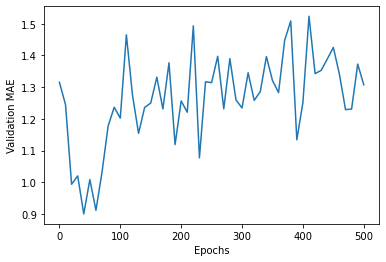

In [79]:
import matplotlib.pyplot as plt
plt.plot(epochs, avg_scores)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()
plt.savefig('epochs_unsmothed')

In [80]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

SyntaxError: invalid syntax (<ipython-input-89-4c04f3969678>, line 4)